# What is the MA Model?
The Moving Average (MA) Model is a way to predict the future value of something (like sales, stock prices, etc.) by looking at errors (unexpected changes) that happened in the past. It's like saying, "Today's value is influenced by mistakes or surprises from the last few days."

## Key Idea:
Instead of using the actual past values (like in an AR model), the MA model looks at how wrong our predictions were in the past and uses that to make future predictions.


### MA Model Formula

For an MA model of order q (denoted as MA(q)), the model can be written as:
>
$$y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}$$


Where:


- `yt`: Actual value of the time series at time t
- `μ`: Mean of the series
- `ϵt`: Error term (white noise) at time t
- `θ1, θ2, ..., θq`: Model parameters (coefficients)
- `ϵ_{t-1}, ϵ_{t-2}, ...`: Previous error terms

### In Simple term:(Formula)
- Today’s value=Mean+Today’s error+Past errors


#### Components of an MA Model:
- **Error Terms (Residuals):**
The model uses the residuals (errors) from previous observations to predict the future values of the time series.For example If we predicted a stock price would be 100 but it turned out to be 105, the error is +5.

- **Order (q):**
The "order" q of the MA model refers to how many lagged error terms are used in the model. For example, in an MA(1) model, only the previous error term (
𝜖
𝑡
−
1
​
 ) is used to model the current value.

## From where the predictions are coming?

1. **Historical Averages:**
Might have used the average sales from the past few days or weeks to make the prediction:

2. **Simple Trend Estimation:**
Could have predicted based on a trend. For example:
If sales were gradually increasing or decreasing over time, you might have estimated that sales would be 90 two days ago, and 100 yesterday based on that trend.
You’re essentially expecting a small change in the sales (up or down) based on recent patterns.

3. **External Factors (Seasonality or Campaigns):**
Your prediction might also be based on external factors like:
Promotions or discounts: If you were running a sale or promotion, you might have expected a specific bump in sales.
Seasonality: You could have anticipated more sales during certain times of the year (holidays, weekends, etc.).

4. **Previous Prediction Model:**
Before switching to the Moving Average Model, you might have been using another forecasting method like:
- Simple moving average: You took an average of the last few days' sales to make predictions.
- Autoregressive (AR) model: You predicted sales based on the actual sales values from previous days.

5. **Intuition:** Sometimes, businesses simply predict based on gut feelings, expert opinions, or ad-hoc methods.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

time = pd.date_range(start='2020-01-01', periods=100, freq='D')

trend = np.linspace(start=20, stop=100, num=len(time))
seasonality = 10 * np.sin(np.linspace(0, 3 * np.pi, len(time)))
noise = np.random.normal(loc=0, scale=2, size=len(time))

actual_sales = trend + seasonality + noise

initial_predictions = np.clip(actual_sales + np.random.normal(loc=0, scale=5, size=len(time)), a_min=0, a_max=None)

errors = actual_sales - initial_predictions

def moving_average(series, window):
    return series.rolling(window=window).mean()

ma1_errors = moving_average(pd.Series(errors), window=5)  
ma2_errors = moving_average(pd.Series(errors), window=10) 

ma1_predictions = initial_predictions + ma1_errors
ma2_predictions = initial_predictions + ma2_errors



In [2]:
predicted_values = pd.DataFrame({
    'Actual Sales': actual_sales,
    'Initial Predictions': initial_predictions,
    'MA(1) Predictions': ma1_predictions,
    'MA(2) Predictions': ma2_predictions
})

predicted_values.head(10)

,Actual Sales,Initial Predictions,MA(1) Predictions,MA(2) Predictions
0,20.993428,13.916575,NaN,NaN
1,21.482113,19.378886,NaN,NaN
2,24.804051,23.090479,NaN,NaN
3,28.287628,24.276241,NaN,NaN
4,26.480641,25.674212,28.816506,NaN
5,28.154395,30.174650,31.497522,NaN
6,33.413319,42.844248,41.860289,NaN
7,33.373025,34.245914,32.744662,NaN
8,32.426488,33.714240,31.153161,NaN
9,35.915343,35.543114,32.895194,35.790301


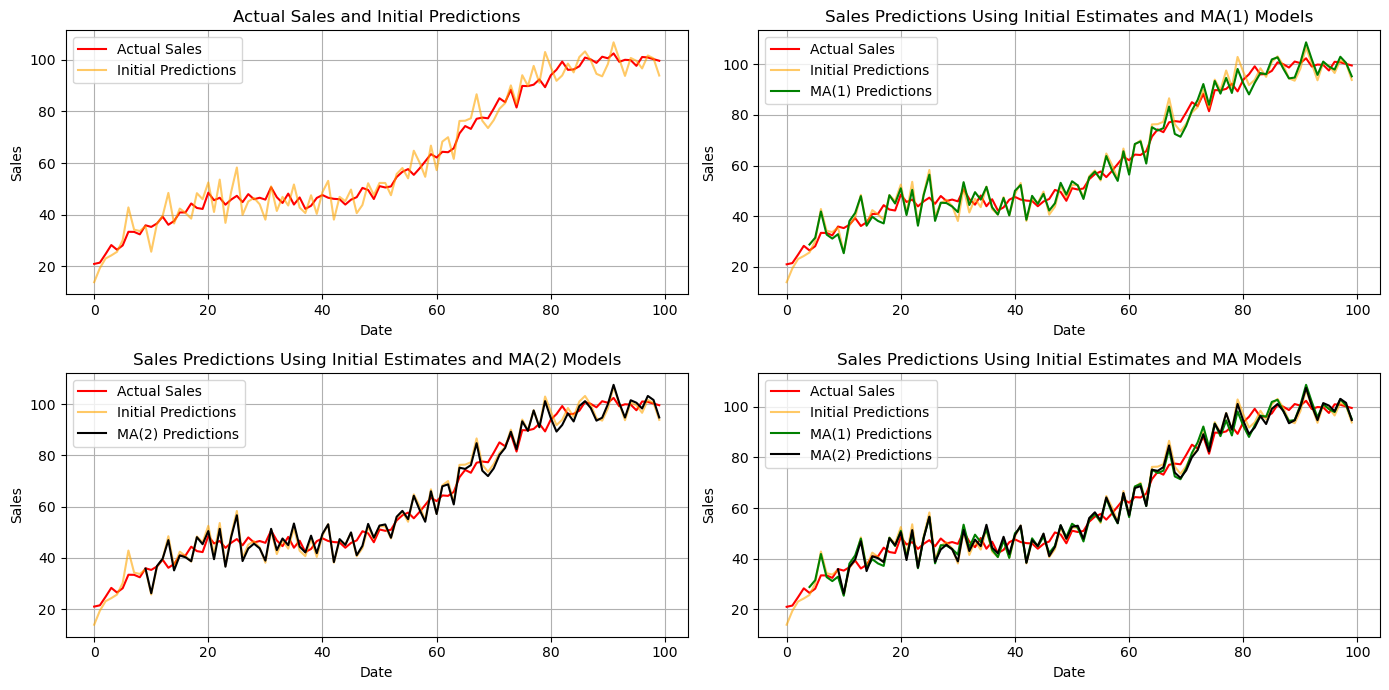

In [3]:
plt.figure(figsize=(14, 7))

plt.subplot(2,2,1)
plt.plot(actual_sales, label='Actual Sales', color='red')
plt.plot(initial_predictions, label='Initial Predictions', color='orange', alpha=0.6)
plt.title('Actual Sales and Initial Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()


plt.subplot(2,2,2)
plt.plot(actual_sales, label='Actual Sales', color='red')
plt.plot(initial_predictions, label='Initial Predictions', color='orange', alpha=0.6)
plt.plot(ma1_predictions, label='MA(1) Predictions', color='green')
plt.title('Sales Predictions Using Initial Estimates and MA(1) Models')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()


plt.subplot(2,2,3)
plt.plot(actual_sales, label='Actual Sales', color='red')
plt.plot(initial_predictions, label='Initial Predictions', color='orange', alpha=0.6)
plt.plot(ma2_predictions, label='MA(2) Predictions', color='black')
plt.title('Sales Predictions Using Initial Estimates and MA(2) Models')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()


plt.subplot(2,2,4)
plt.plot(actual_sales, label='Actual Sales', color='red')
plt.plot(initial_predictions, label='Initial Predictions', color='orange', alpha=0.6)
plt.plot(ma1_predictions, label='MA(1) Predictions', color='green')
plt.plot(ma2_predictions, label='MA(2) Predictions', color='black')
plt.title('Sales Predictions Using Initial Estimates and MA Models')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



# What is best 

| Reasons                     | Why We Use MA Models                                   | Why We Might Not Use MA Models                         |
|-----------------------------|-------------------------------------------------------|--------------------------------------------------------|
| **Simplicity**              | Easy to understand and implement.                     | May oversimplify complex data patterns.                |
| **Error Correction**        | Uses past errors to refine current predictions.       | Slow to respond to sudden changes in trends.           |
| **Noise Reduction**         | Smooths out random fluctuations, highlighting trends. | May miss sudden spikes or drops in data.               |
| **Stationary Data**         | Effective for stationary datasets with constant patterns.| Not suitable for non-stationary data with changing trends.|
| **Seasonal Patterns**       | Can model seasonal variations with extensions (e.g., SMA).| Seasonal patterns might require more sophisticated modeling.|
| **Modeling Flexibility**    | Can be easily adjusted for different time lags.      | Higher-order MA models can lead to overfitting.       |
| **Low Computational Cost**  | Requires less computational resources compared to complex models.| May not capture all underlying dynamics in highly variable data.|
| **Limited Data Requirements**| Works with smaller datasets compared to some other methods.| Requires enough data points for meaningful averages.   |
